# User Guide
Welcome to ``pyquafu``! [Quafu](http://quafu.baqis.ac.cn/) shares open access to super-conducting quantum (ScQ) computing resources with public users from all around the world. As the python SDK of [Quafu](http://quafu.baqis.ac.cn/), ``pyquafu`` provides not only flexible and advanced interfaces to the experimental backends, but also useful tooltiks for simulating, visualizing and more about quantum computation. This doc describes its basic syntax and usages. 

## Installation
``pyquafu`` requires ``python>=3.8``. And it's suggested to activate an individual virtual environment for it, see for axample [quafu-tutorial-venv](https://github.com/ScQ-Cloud/quafu-tutorial/blob/main/python_skill/Use%20Python%20Virtual%20Environment.md). 

For the latest stable version, run the following codes in the command line/terminal:
```
pip install pyquafu 
```

## Set up your Quafu account
If you haven't have an account, you may register on the [Quafu](http://quafu.baqis.ac.cn/) website at first. Then you will find your apitoken `<your API token>`on the ``Dashboard`` page, which is required when you send tasks to ScQ-chips.

By executing the following codes your token will be saved to your local device.

In [2]:
from quafu import User
user = User("<your API token>")
user.save_apitoken()

Once you've done this, you may look over the available ScQ-chips in the experimental backends.

In [2]:
available_backends = user.get_available_backends()

system_name	 qubits	 status
ScQ-P10   	 10   	 Online
ScQ-P18   	 18   	 Online
ScQ-P136  	 136  	 Online


*Note*: The next time you visit ``pyquafu``, you don't have to save the token again. Yet a quafu token is not permanently validating, from time to time you may click **``refresh``** to get a new one on [Quafu](http://quafu.baqis.ac.cn/) webpage .

## Build your first quantum circuit

Let's start by initializing a circuit with 5 qubits,

In [46]:
import numpy as np
from quafu import QuantumCircuit

qc = QuantumCircuit(5)

### Apply Gates

``PyQuafu`` supports '``qc.name(args)``' style to apply gates and also other instructions. 

In [18]:
qc.x(0)
qc.x(1) 
qc.cnot(2, 1) 
qc.ry(1, np.pi/2) 
qc.rx(2, np.pi) 
qc.rz(3, 0.1) 
qc.cz(2, 3) 

Alternatively, you may manually instantiate a gate and add it to the circuit.

In [19]:
# equivalent to qc.x(0) 
import quafu.elements.element_gates as qeg
gate = qeg.XGate(pos=0)
qc.add_gate(gate)

This is actually what '``.name(args)`` functions do. You would find the second style convenient when build a new circuit from existing one.

For quantum gates Quafu supports, please check the API reference for [`QuantumCircuit`](apiref/#quafu.QuantumCircuit) or use python-buitin ``dir()`` method.

In [20]:
print(dir(qc))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_used_qubits', 'add_gate', 'add_pulse', 'barrier', 'circuit', 'cnot', 'cp', 'cs', 'ct', 'cx', 'cy', 'cz', 'delay', 'draw_circuit', 'fredkin', 'from_openqasm', 'gates', 'h', 'id', 'iswap', 'layered_circuit', 'mcx', 'mcy', 'mcz', 'measure', 'measures', 'num', 'openqasm', 'p', 'plot_circuit', 'rx', 'rxx', 'ry', 'ryy', 'rz', 'rzz', 's', 'sdg', 'sw', 'swap', 'sx', 'sxdg', 'sy', 'sydg', 't', 'tdg', 'to_openqasm', 'toffoli', 'unitary', 'used_qubits', 'w', 'x', 'xy', 'y', 'z']


### Measure

Add measurement information including qubits measured (`measures`) and the classical bits keeping the measured results (`cbits`). If there is no measurement information provided, all qubits are measured by default.  

In [21]:
measures = [0, 1, 2, 3, 4]
cbits = [0, 1, 2, 4, 3]
qc.measure(measures,  cbits=cbits)
qc.measures

{0: 0, 1: 1, 2: 2, 3: 4, 4: 3}

### Visualize

From ``version=0.3.2``, ``PyQuafu`` provides two similiar ways to visualize quantum circuits. You can draw the circuit using the [`draw_circuit`](apiref/#quafu.circuits.quantum_circuit.QuantumCircuit.draw_circuit) method and use `width` parameter to adjust the length of the circuit.

In [22]:
qc.draw_circuit(width=4)

q[0]  ------X--------X-------------------- M->c[0]
                                          
q[1]  ------X--------+----RY(1.571)------- M->c[1]
                     |                    
q[2]  ---------------*----RX(3.142)----*-- M->c[2]
                                       |  
q[3]  --RZ(0.100)----------------------Z-- M->c[4]
                                          
q[4]  ------------------------------------ M->c[3]


Alternatively, you may create a figure by

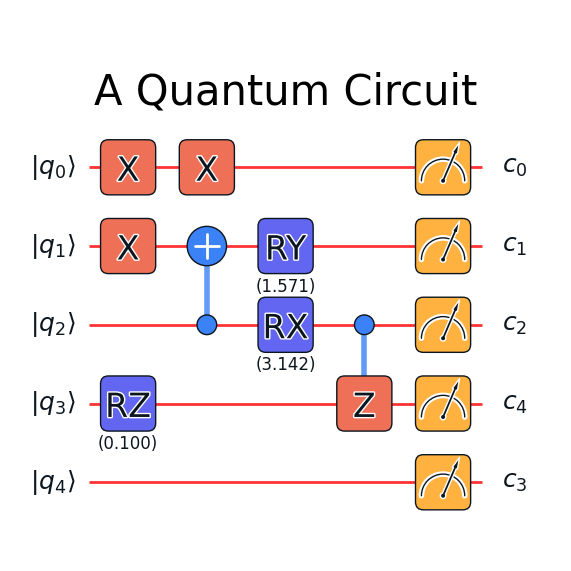

In [23]:
qc.plot_circuit(title='A Quantum Circuit')

The latter visualization uses ``matplotlib`` as the backend and you may save the figure as any format that ``matplotlib`` supports.

### OPENQASM Support

``pyquafu`` is backward compatible with quantum gates in [OPENQASM2.0](https://arxiv.org/abs/1707.03429). You can store your quantum circuit as openqasm string, and also initialize your quantum circuit with openqasm text.

In [24]:
qasm = qc.to_openqasm()
print(qasm)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[5];
creg meas[5];
x q[0];
x q[1];
cx q[2],q[1];
ry(1.5707963267948966) q[1];
rx(3.141592653589793) q[2];
rz(0.1) q[3];
cz q[2],q[3];
x q[0];
measure q[0] -> meas[0];
measure q[1] -> meas[1];
measure q[2] -> meas[2];
measure q[3] -> meas[4];
measure q[4] -> meas[3];



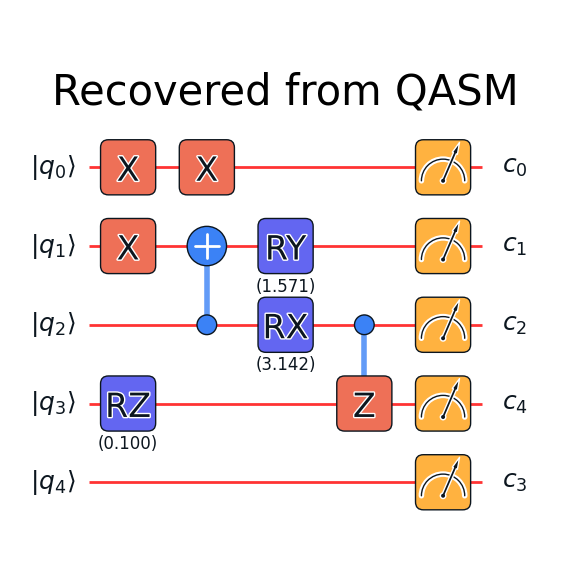

In [25]:
del qc
qc = QuantumCircuit(5)
qc.from_openqasm(qasm)
qc.plot_circuit('Recovered from QASM')

## Execution and Simulation
Now you are ready to submit the circuit to the experimental backend. First, initialize a Task object 

In [3]:
from quafu import Task
task = Task()

You can configure your task properties using the [`config`](apiref/#quafu.tasks.tasks.Task.config) method. Here we choose the backend (`backend`) as `ScQ-P18`, the single shots number (`shots`) as 2000 and compile the circuit on the backend (`compile`).

In [27]:
task.config(backend="ScQ-P18", shots=2000, compile=True)

If you set the `compile` parameter to `False`, make sure that you know the topology of the backend well and submit a valid circuit.

Send the quantum circuit to the backend and wait for the results.

In [28]:
res = task.send(qc, wait=True)

You can use the returned results to check the count and probability of each measured bit string. The output bits are arranged in **big-endian** convention by default, see also <a href="#a_subtle_detail">the next sectioin</a>.

OrderedDict([('00100', 717), ('00110', 31), ('01000', 6), ('01100', 1185), ('01110', 39), ('10100', 22)])
{'00100': 0.3585, '00110': 0.0155, '01000': 0.003, '01100': 0.5925, '01110': 0.0195, '10100': 0.011}


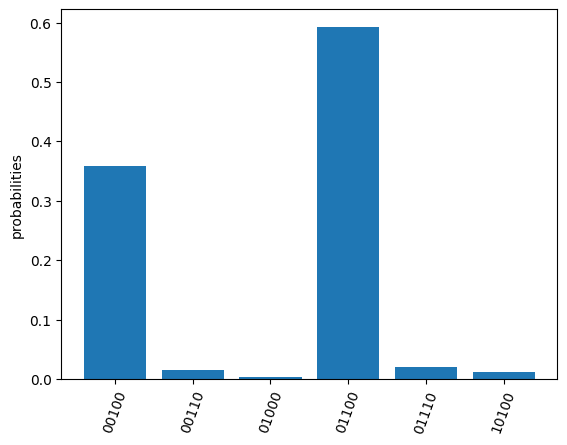

In [50]:
print(res.counts) #counts
print(res.probabilities) #probabilities
res.plot_probabilities()

The returned results contain also the **compiled circuit**, from which you may find optimization was made. 

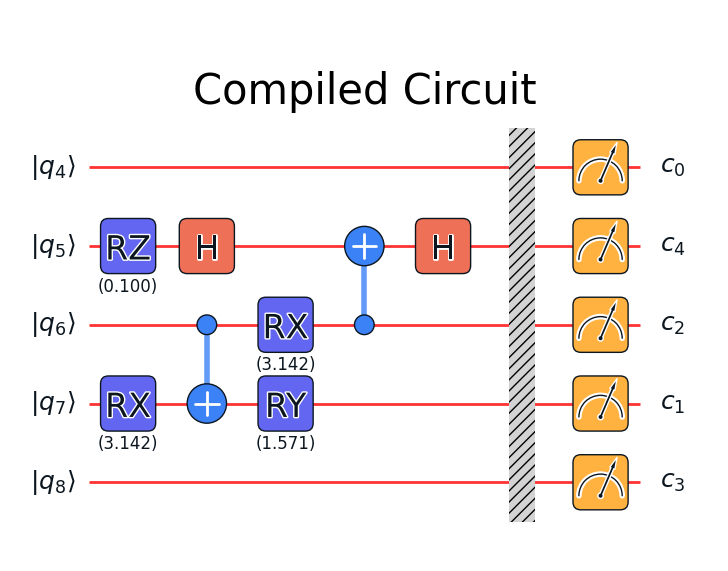

In [29]:
res.transpiled_circuit.plot_circuit("Compiled Circuit")

If you want to check the correctness of the executed results. Quafu provide simple circuit similator

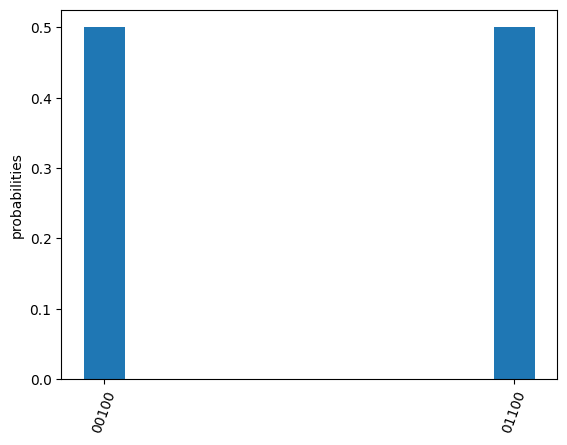

In [30]:
from quafu import simulate
simu_res = simulate(qc, output="probabilities")
simu_res.plot_probabilities()

If you don't want to plot the results for basis with zero probabilities, set the parameter `full` in method [`plot_probabilities`](apiref/#quafu.results.results.SimuResult.plot_probabilities) to False. Note that this parameter is only valid for results returned by the simulator. 

### <a id="a_subtle_detail">A Subtle detail</a>

There are two different conventions when writing a computational basis as a bit-string. That is, for example, to denote the state where only the first qubit is excited, some may write 10...000 while others use 000...01. This subtle detail sometimes causes confusion and even serious error in computation. The following experiment demonstrates conventions used in ``pyquafu``.   

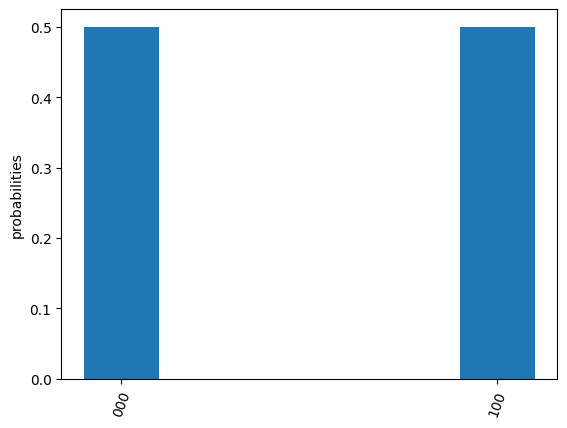

In [10]:
from quafu import QuantumCircuit, simulate

n = 3
qc = QuantumCircuit(n)  # |000>
qc.h(0)  # |100> + |000>
qc.measure()

res = simulate(qc)
res.plot_probabilities()

Here you see that in ``pyquafu``, ``counts`` obeys so-called 'big-endian'. However, for some historical reasons, the state-vector use small-endian instead.

In [18]:
res = simulate(qc, output='state_vector')
print(res.state_vector[:2])
state_tensor = res.state_vector.reshape(tuple(n*[2])).transpose([-3, -2, -1])
print(state_tensor[0, 0, 0])
print(state_tensor[0, 0, 1])
print(state_tensor[1, 0, 0])

[0.70710678+0.j 0.70710678+0.j]
(0.7071067811865475+0j)
(0.7071067811865475+0j)
0j


If this is not the convention you are used to, ``ndarray.transpose`` may help

In [19]:
state_tensor = state_tensor.transpose(tuple(range(n-1, -1, -1)))

## Measure observables

Quafu provides measuring observables with an executed quantum circuit. You can input Pauli operators that need to measure expectation values to the [`submit`](apiref/#quafu.tasks.tasks.Task.submit) method.
For example, you can input [["XYX", [0, 1, 2]], ["Z", [1]]] to calculate the expectation of operators $\sigma^x_0\sigma^y_1\sigma^x_2$ and $\sigma^z_1$.
The [`submit`](apiref/#quafu.tasks.tasks.Task.submit) method will minimize the executing times of the circuit with different measurement basis that can calculate all expectations of input operators. 

Here we show how to measure the energy expectation of the Ising chain
$$H=\sum_i \sigma^z_i \sigma^z_{i+1} + g \sum_i \sigma^x_i.$$
First, we initialize a circuit with three Hadamard gate

In [18]:
q = QuantumCircuit(5)

for i in range(5):
    if i % 2 == 0:
        q.h(i)

measures = list(range(5))
q.measure(measures)
q.draw_circuit()

q[0]  --H-- M->c[0]
           
q[1]  ----- M->c[1]
           
q[2]  --H-- M->c[2]
           
q[3]  ----- M->c[3]
           
q[4]  --H-- M->c[4]


Next, we set operators that need to be measured to calculate the energy expectation, and submit the circuit using [`submit`](apiref/#quafu.tasks.tasks.Task.submit) method

In [15]:
test_Ising = [["X", [i]] for i in range(5)]
test_Ising.extend([["ZZ", [i, i+1]] for i in range(4)])
res, obsexp = task.submit(q, test_Ising)

Job start, need measured in  [['XXXXX', [0, 1, 2, 3, 4]], ['ZZZZZ', [0, 1, 2, 3, 4]]]


The function return measurement results and operator expectations. The measurement results only contain two ExecResult objects since the circuit is only executed twice, with measurement basis  [['XXXXX', [0, 1, 2, 3, 4]] and ['ZZZZZ', [0, 1, 2, 3, 4]]] respectively.

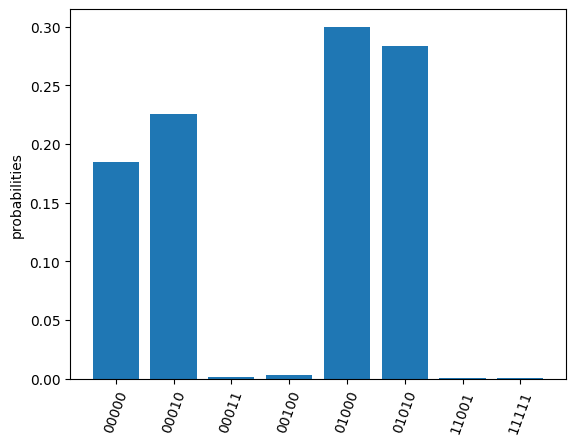

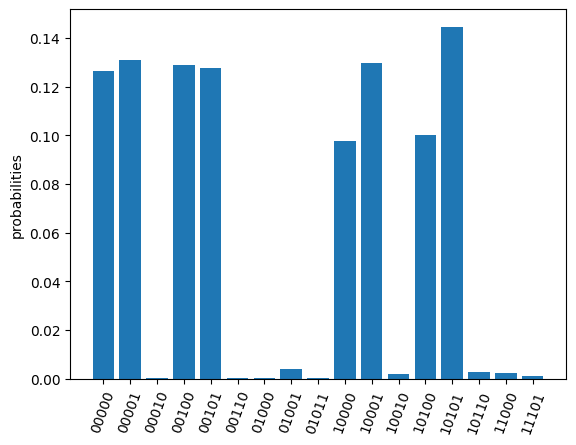

In [16]:
res[0].plot_probabilities()
res[1].plot_probabilities()

The return operator expectations (`obsexp`) is a list with a length equal to the input operator number. We can use it to calculate the energy expectation 

In [10]:
print(obsexp)
g = 0.5
E = g*sum(obsexp[:5])+sum(obsexp[5:])
print(E)

[1.0, 0.046999999999999986, 1.0, 0.03699999999999998, 0.998, 0.00899999999999995, 0.08499999999999996, 0.08299999999999996, 0.008999999999999952]
1.7269999999999999


## Submit task asynchronously
In the above examples, we chose opening python kernal and waiting for the result. You may also set the `wait=False` in [`send`](apiref/#quafu.tasks.tasks.Task.send) function to submit the task asynchronously. Here we use another example that measures the qubit decoherence time $T_1$ to demonstrate the usage.

In [47]:
task = Task()
task.config(backend="ScQ-P10", shots=2000, compile=False, priority=2)

Prepare parameters of a group of tasks and send the task asynchronously.

In [48]:
ts = range(0, 21, 1)
names = ["%dus" %t for t in ts]
for name, t in zip(names, ts): 
    q = QuantumCircuit(3)
    q.x(2)
    q.delay(2, t, unit="us")
    q.measure([2])
    res = task.send(q, wait=False, name=name, group="Q3_T1")

Here the `delay` options will idle the target qubit `2` for a duration `t` in the time unit `us`(microsecond) and do nothing. In the send function, we set `wait` to false to execute the task asynchronously, give each task a name by duration time and set all tasks to a group named "Q3_T1".

Now we can try to retrieve the group of tasks using the [`retrieve_group`](apiref/#quafu.tasks.tasks.Task.retrieve_group) method.

In [61]:
group_res = task.retrieve_group("Q3_T1")
probs = [res.probabilities["1"] for res in group_res]

Group:  Q3_T1
task_id              task_name      status    
326564501AF5CF47     0us            Completed 
32656450226701BD     1us            Completed 
326564502A80CC5D     2us            Completed 
3265645032D98C32     3us            Completed 
326564503AEFE7EA     4us            Completed 
326564600CFE2817     5us            Completed 
3265646014FFEA5F     6us            Completed 
326564601C2E9597     7us            Completed 
32656460240A93E6     8us            Completed 
326564602C15CFFB     9us            Completed 
3265646033EEBD20     10us           Running   
326564603B1A478D     11us           In Queue  
3265647006C96D3D     12us           In Queue  
326564700F71B85A     13us           In Queue  
32656470204A3472     14us           In Queue  
32656470384DCD98     15us           In Queue  
3265648004FB6BCF     16us           In Queue  
326564800DA63F54     17us           In Queue  
3265648022DAC675     18us           In Queue  
3265648036F7EA24     19us           In Queue  

Once all the tasks are completed, we can do the next step to get $T_1$.

In [67]:
group_res = task.retrieve_group("Q3_T1")
probs = [res.probabilities["1"] for res in group_res]

Group:  Q3_T1
task_id              task_name      status    
326564501AF5CF47     0us            Completed 
32656450226701BD     1us            Completed 
326564502A80CC5D     2us            Completed 
3265645032D98C32     3us            Completed 
326564503AEFE7EA     4us            Completed 
326564600CFE2817     5us            Completed 
3265646014FFEA5F     6us            Completed 
326564601C2E9597     7us            Completed 
32656460240A93E6     8us            Completed 
326564602C15CFFB     9us            Completed 
3265646033EEBD20     10us           Completed 
326564603B1A478D     11us           Completed 
3265647006C96D3D     12us           Completed 
326564700F71B85A     13us           Completed 
32656470204A3472     14us           Completed 
32656470384DCD98     15us           Completed 
3265648004FB6BCF     16us           Completed 
326564800DA63F54     17us           Completed 
3265648022DAC675     18us           Completed 
3265648036F7EA24     19us           Completed 

Text(16, 0.9, '$T_1=24.18 \\mu s$')

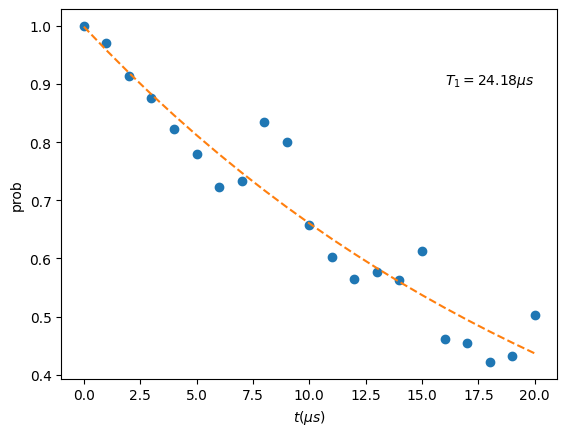

In [68]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def func(x, a, b):
    return a*np.exp(-b*x)

paras, pconv = curve_fit(func, ts, probs)
plt.plot(ts, probs, "o")
plt.plot(ts, func(ts, *paras), "--")
plt.xlabel("$t (\mu s)$")
plt.ylabel("prob")
plt.text(16, 0.9, r"$T_1=%.2f \mu s$" %(1/paras[1]))

Note that ``group_name`` and submite history are kept in the `task` object only when ``python`` kernal is running. For data persistence, we provide ``TaskDatabase`` which use ``qslite3`` as the backend. It may help you to save task information to your local computer. 

We would not devote too much into developing ``TaskDatabase`` since the web-backends will prodive more powerful and convenient usages in the future. However, if you are interested in manipulating database freely by ``qslite3``, we do provide [tutorial](https://github.com/ScQ-Cloud/quafu-tutorial/tree/main/python_skill) for a quick start.

In [69]:
from quafu.tasks.task_database import QuafuTaskDatabase, print_task_info

with QuafuTaskDatabase() as db:
    for res in group_res:
        db.insert_task(res.taskid, res.task_status, group_name="Q3_T1", task_name=res.taskname, priority=2)
    print('Tasks info stored')
    print("Task list:")
    for task_info in db.find_all_tasks():
        print_task_info(task_info) 
        break  # this is to avoid demo too long, you may cancel this line to view the whole info

Tasks info stored
Task list:
Task ID: 326564501AF5CF47
Group Name: Q3_T1
Task Name: 0us
Status: Completed
Priority: 2
Send Time: None
Finish Time: None
------------------------


Finally, you can also retrieve a single task using its unique `task_id`, and download all the historical tasks in [Quafu](http://quafu.baqis.ac.cn/) webpage.

In [70]:
res_20us = task.retrieve("1663B8403AE76050")
print(res_20us.probabilities)

{'0': 0.662, '1': 0.338}
